<a href="https://colab.research.google.com/github/polina-minaeva/outlier-detection/blob/main/10_%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D0%B2%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D0%BE%D0%B2_%D0%B8_%D0%B3%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%BE%D0%B2%D1%8B%D1%85_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузка данных

In [ ]:
import pandas as pd

In [ ]:
glasses = pd.read_csv('glass.csv')
glasses

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Ri - refractive index - показетель преломления

Другие обозначения - вещество в стекле

Type - тип стекла

2. Анализ данных

In [ ]:
glasses.groupby(['Type']).count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


Количество стекол для каждого типа неравномерное. Больше всего стекол типа 1 и типа 2: термополированное и нетермополированное стекло для зданий.

Мало стекол у типов 5 и 6: стекло для контейнеров и стекло для посуды.

3. Разделение выборки на train и test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(glasses.drop(columns='Type'),
                                                    glasses['Type'],
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape

((171, 9), (43, 9))

4. Обучение модели дерева решений RandomForestClassifier на обучающем множестве

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

5. Предсказание типа стекла для тестового множества и подсчет точности предсказания модели (accuracy)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 7, 2, 1, 2, 6, 2, 7, 1, 1, 2, 2, 7,
       7, 7, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 7, 5, 1, 1, 2, 2, 7, 1])

In [ ]:
model.score(X_test, y_test)

0.7209302325581395

Точность классификатора случайного леса составила 72%

6. Обработка выбросов в данных

<Axes: xlabel='RI', ylabel='Count'>

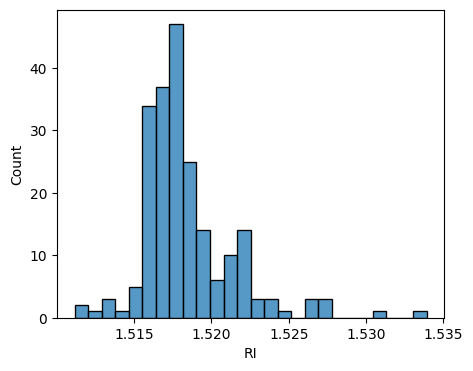

In [ ]:
#посмотрим на распределение значений для переменных, для этого нарисуем графики гистограммы

import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 5,4


sns.histplot(data=glasses['RI'])

In [ ]:
#для RI распределение ненормальное

<Axes: xlabel='Na', ylabel='Count'>

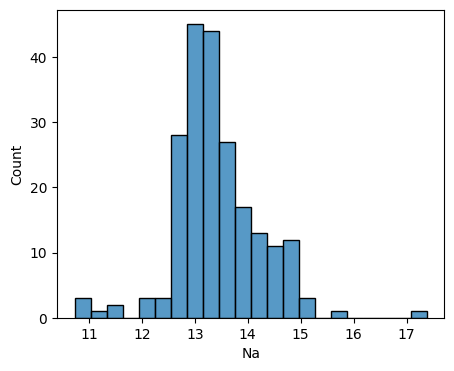

In [ ]:
sns.histplot(data=glasses['Na'])

In [ ]:
#для Na распределение ненормальное

<Axes: xlabel='Mg', ylabel='Count'>

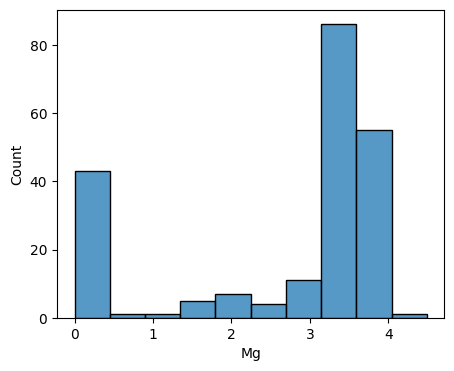

In [ ]:
sns.histplot(data=glasses['Mg'])

In [ ]:
#для Mg распределение ненормальное

<Axes: xlabel='Al', ylabel='Count'>

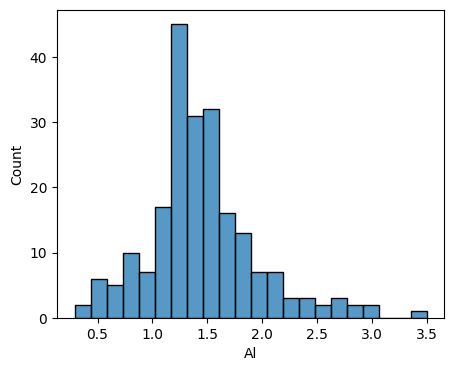

In [ ]:
sns.histplot(data=glasses['Al'])

In [ ]:
#для Al распределение почти нормальное

<Axes: xlabel='Si', ylabel='Count'>

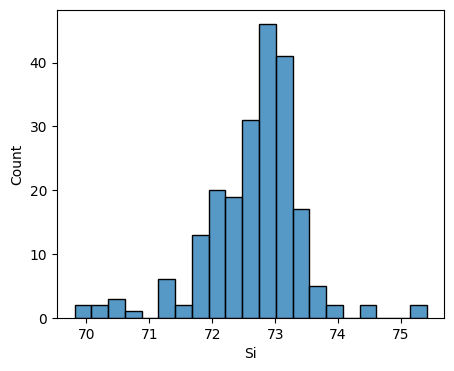

In [ ]:
sns.histplot(data=glasses['Si'])

In [ ]:
#для Si распределение ненормальное

<Axes: xlabel='K', ylabel='Count'>

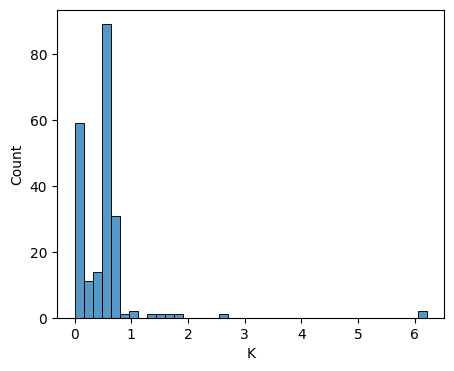

In [ ]:
sns.histplot(data=glasses['K'])

In [ ]:
#для K распределение ненормальное

<Axes: xlabel='Ca', ylabel='Count'>

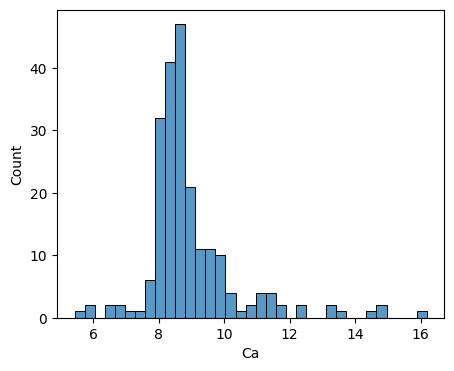

In [ ]:
sns.histplot(data=glasses['Ca'])

In [ ]:
#для Ca распределение ненормальное

<Axes: xlabel='Ba', ylabel='Count'>

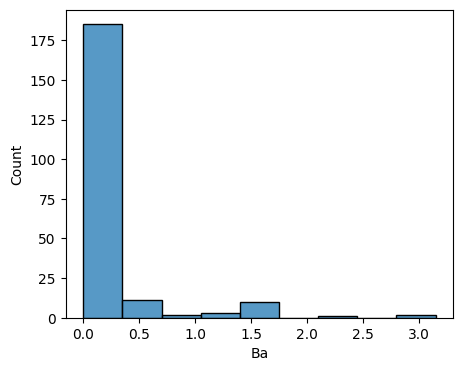

In [ ]:
sns.histplot(data=glasses['Ba'])

In [ ]:
#для Ba распределение ненормальное

<Axes: xlabel='Fe', ylabel='Count'>

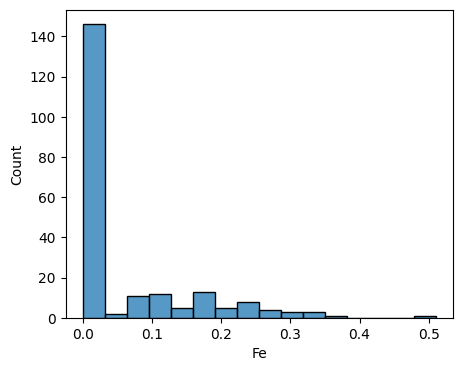

In [ ]:
sns.histplot(data=glasses['Fe'])

In [ ]:
#для Fe распределение ненормальное

<Axes: >

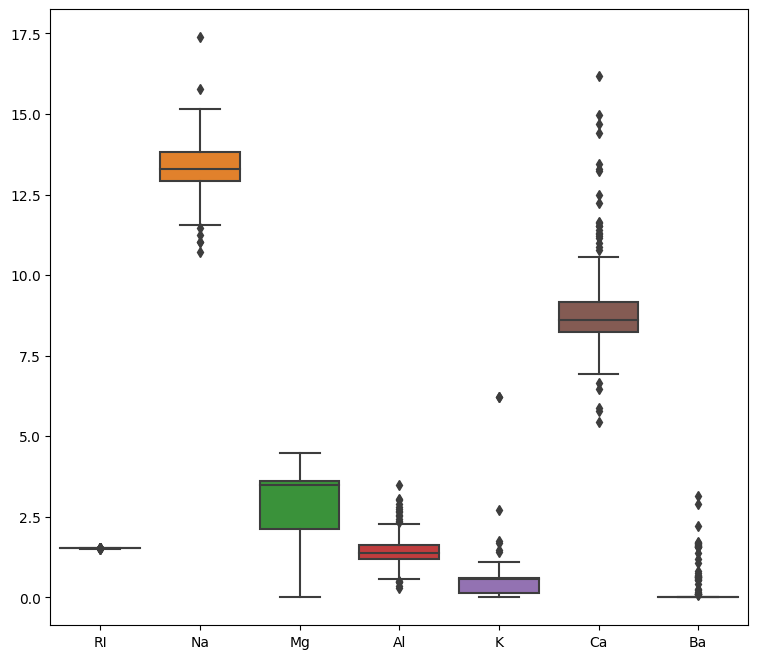

In [ ]:
#теперь построим графики ящики с усами для выявления выбросов в признаках

rcParams['figure.figsize'] = 9,8

sns.boxplot(data=glasses.drop(columns=['Type', 'Si', 'Fe']))

<Axes: >

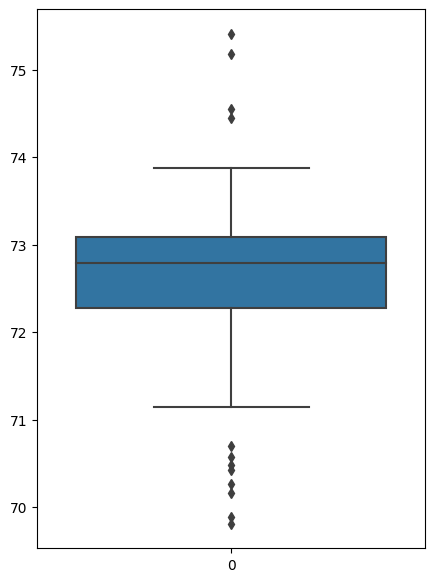

In [ ]:
rcParams['figure.figsize'] = 5,7

sns.boxplot(data=glasses['Si'])

<Axes: >

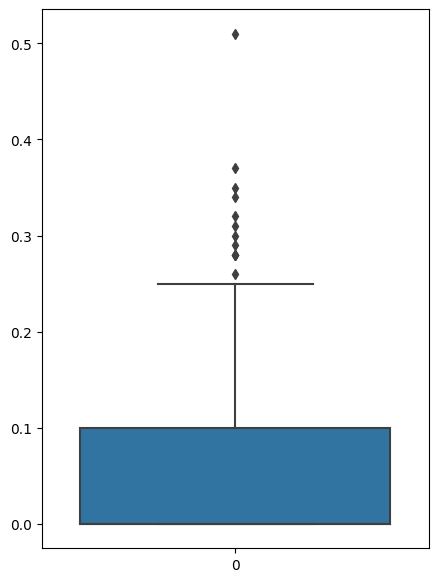

In [ ]:
sns.boxplot(data=glasses['Fe'])

In [ ]:
#а для удаления выбросов воспользуемся двумя моделями

from sklearn.neighbors import LocalOutlierFactor

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#выберем два признака

X1_df_with_classes = glasses[['Na', 'Si', 'Type']]
X1_df_with_classes

,Na,Si,Type
0,13.64,71.78,1
1,13.89,72.73,1
2,13.53,72.99,1
3,13.21,72.61,1
4,13.27,73.08,1
...,...,...,...
209,14.14,72.61,7
210,14.92,73.06,7
211,14.36,73.42,7
212,14.38,73.61,7


In [ ]:
X1_df = glasses[['Na', 'Si']]
X1_df

,Na,Si
0,13.64,71.78
1,13.89,72.73
2,13.53,72.99
3,13.21,72.61
4,13.27,73.08
...,...,...
209,14.14,72.61
210,14.92,73.06
211,14.36,73.42
212,14.38,73.61


In [ ]:
X1 = np.asarray(X1_df)
X1

array([[13.64, 71.78],
       [13.89, 72.73],
       [13.53, 72.99],
       [13.21, 72.61],
       [13.27, 73.08],
       [12.79, 72.97],
       [13.3 , 73.09],
       [13.15, 73.24],
       [14.04, 72.08],
       [13.  , 72.99],
       [12.72, 73.2 ],
       [12.8 , 73.01],
       [12.88, 73.28],
       [12.86, 73.21],
       [12.61, 73.29],
       [12.81, 73.24],
       [12.68, 73.11],
       [14.36, 71.36],
       [13.9 , 72.12],
       [13.02, 72.73],
       [12.82, 72.75],
       [14.77, 72.02],
       [12.78, 72.79],
       [12.81, 73.02],
       [13.38, 72.85],
       [12.98, 73.  ],
       [13.21, 72.64],
       [12.87, 73.04],
       [12.56, 73.15],
       [13.08, 72.86],
       [12.65, 73.08],
       [12.84, 73.27],
       [12.85, 72.97],
       [12.57, 73.39],
       [12.69, 72.95],
       [13.29, 72.74],
       [13.89, 71.81],
       [12.74, 72.96],
       [14.21, 71.77],
       [14.21, 71.77],
       [12.79, 73.03],
       [12.71, 73.2 ],
       [13.21, 72.76],
       [13.

In [ ]:
import matplotlib.font_manager

from sklearn.ensemble import IsolationForest

In [ ]:
X1[:, 0]

array([13.64, 13.89, 13.53, 13.21, 13.27, 12.79, 13.3 , 13.15, 14.04,
       13.  , 12.72, 12.8 , 12.88, 12.86, 12.61, 12.81, 12.68, 14.36,
       13.9 , 13.02, 12.82, 14.77, 12.78, 12.81, 13.38, 12.98, 13.21,
       12.87, 12.56, 13.08, 12.65, 12.84, 12.85, 12.57, 12.69, 13.29,
       13.89, 12.74, 14.21, 14.21, 12.79, 12.71, 13.21, 13.73, 12.73,
       13.49, 13.19, 13.99, 13.21, 13.58, 13.72, 13.2 , 13.43, 13.14,
       13.21, 12.45, 12.99, 12.87, 13.48, 13.39, 13.6 , 13.81, 13.51,
       14.17, 13.48, 13.69, 13.05, 13.05, 13.12, 13.31, 14.86, 13.64,
       13.09, 13.34, 13.02, 13.02, 13.44, 13.  , 13.92, 12.82, 12.86,
       13.25, 13.41, 13.09, 14.25, 13.36, 13.24, 13.4 , 13.01, 12.55,
       12.93, 12.9 , 13.12, 13.24, 12.71, 13.36, 13.02, 12.2 , 12.67,
       12.96, 12.75, 12.35, 12.62, 13.8 , 13.83, 11.45, 10.73, 12.3 ,
       14.43, 13.72, 11.23, 11.02, 12.64, 13.46, 13.1 , 13.41, 13.24,
       13.72, 13.3 , 13.56, 13.25, 12.93, 13.23, 13.48, 13.2 , 12.93,
       12.94, 13.78,

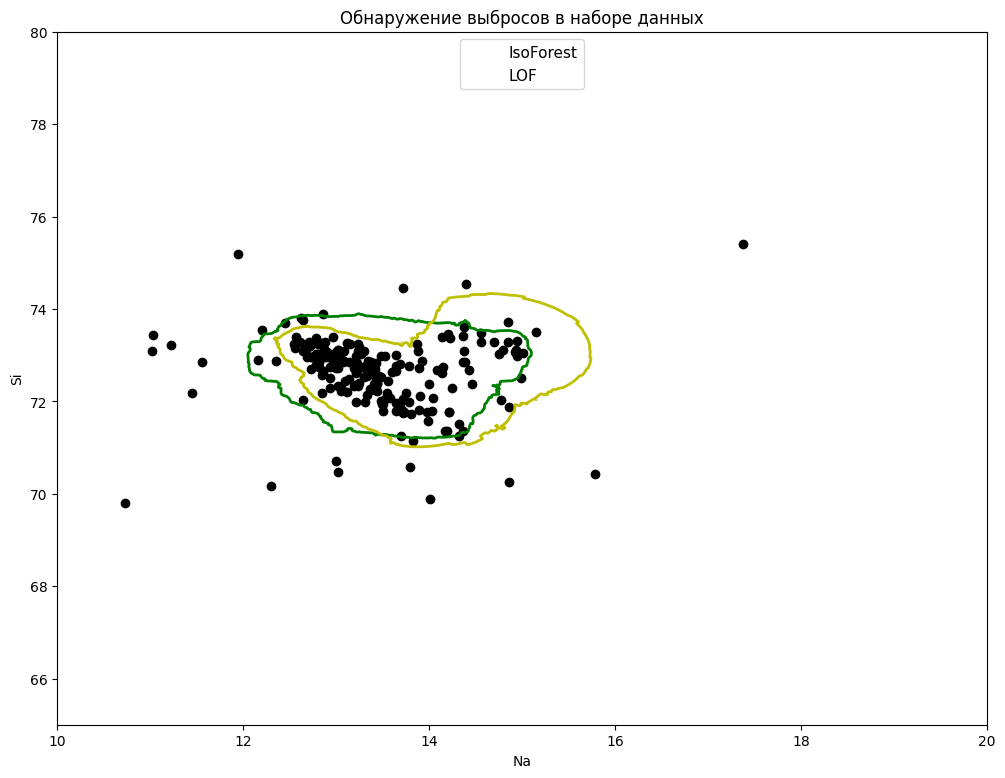

Получаем разделяющую поверхность, где видны выбросы данных


In [ ]:
#пишем используемые модели
classifiers = {
    "IsoForest": IsolationForest(),
    "LOF": LocalOutlierFactor(novelty=True)
}

#устанавливаем цвета
colors = ['g', 'y']
legend1 = {}
legend2 = {}

#выделяем границы обнаружения выбросов
xx1, yy1 = np.meshgrid(np.linspace(10, 20, 500), np.linspace(65, 80, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1, figsize=(12,9))
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

#составляем легенду графика
legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

#рисуем график
plt.figure(1, figsize=(12,9))
plt.title('Обнаружение выбросов в наборе данных')
plt.scatter(X1[:, 0], X1[:, 1], color='black')

plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0], legend1_values_list[1].collections[0],),
           (legend1_keys_list[0], legend1_keys_list[1],),
           loc='upper center',
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.ylabel('Si')
plt.xlabel('Na')
plt.show()
print('Получаем разделяющую поверхность, где видны выбросы данных')

In [ ]:
#зеленая линия - лес
#желтая линия - LOF

In [ ]:
X1_df_with_classes

,Na,Si,Type
0,13.64,71.78,1
1,13.89,72.73,1
2,13.53,72.99,1
3,13.21,72.61,1
4,13.27,73.08,1
...,...,...,...
209,14.14,72.61,7
210,14.92,73.06,7
211,14.36,73.42,7
212,14.38,73.61,7


In [ ]:
#удаляем выбросы с помощью loc
X1_df_clean = X1_df_with_classes.loc[((X1_df_with_classes['Si'] >= 71) & (X1_df_with_classes['Si' ] <= 74) & (X1_df_with_classes['Na'] > 12) & (X1_df_with_classes['Na'] < 15.7))]
X1_df_clean

,Na,Si,Type
0,13.64,71.78,1
1,13.89,72.73,1
2,13.53,72.99,1
3,13.21,72.61,1
4,13.27,73.08,1
...,...,...,...
209,14.14,72.61,7
210,14.92,73.06,7
211,14.36,73.42,7
212,14.38,73.61,7


In [ ]:
#число строк уменьшилось

7. Обучение модели на данных без выбросов

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1_df_clean.drop(columns='Type'),
                                                    X1_df_clean['Type'],
                                                    test_size=0.2,
                                                    random_state=42)
X_train2.shape, X_test2.shape

((157, 2), (40, 2))

In [ ]:
model2 = RandomForestClassifier(max_depth=3, random_state=42)
model2.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred2 = model2.predict(X_test2)
y_pred2

array([2, 2, 1, 2, 1, 7, 1, 2, 1, 7, 7, 1, 2, 2, 2, 1, 2, 1, 2, 7, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 7, 2, 1, 2, 1, 2, 1, 2])

In [ ]:
model2.score(X_test2, y_test2)

0.55

8. Выводы

Данные для модели были преобразованы посредством удаления выбросов. Они влияют на точность модели.

Для выявления и удаления выбросов было проделано несколько шагов: изучение данных на нормальность распределения с помощью гистрограмм, с помощью ящика с усами, а также построение двух моделей – LOF и случайный лес.